In [3]:
from vidaug import augmentors as va

In [38]:
# Define augmentation sequence
sometimes = lambda aug: va.Sometimes(0.5, aug)  # Used to apply augmentor with 50% probability
seq = va.Sequential([
    va.RandomRotate(degrees=15),  # randomly rotates the video with a degree randomly chosen from [-10, 10]
    va.GaussianBlur(sigma=0.3),
    # va.InvertColor(),  # Commented out - too extreme for visualization
    va.Downsample(ratio=0.5),  # Commented out for testing
])

In [31]:
import cv2
import numpy as np
import os
from IPython.display import display, HTML
import matplotlib.pyplot as plt

def load_video_frames(video_path, max_frames=None):
    """Load video frames as a list of numpy arrays"""
    cap = cv2.VideoCapture(video_path)
    frames = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # Convert BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        
        if max_frames and len(frames) >= max_frames:
            break
    
    cap.release()
    return frames

def save_video(frames, output_path, fps=30):
    """Save frames as video"""
    if len(frames) == 0:
        return
    
    height, width = frames[0].shape[:2]
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    for frame in frames:
        # Convert to uint8 if needed (vidaug may output float64 normalized 0-1)
        if frame.dtype != np.uint8:
            # Check if values are normalized (0-1) or in 0-255 range
            if np.max(frame) <= 1.0:
                # Normalized float: scale to 0-255
                frame = (frame * 255).astype(np.uint8)
            else:
                # Float in 0-255 range: just clip and convert
                frame = np.clip(frame, 0, 255).astype(np.uint8)
        # Convert RGB back to BGR for OpenCV
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)
    
    out.release()

print("Helper functions loaded!")

Helper functions loaded!


In [32]:
# Load a sample video from Augmented_Dataset
video_path = r"c:\\Users\\DHIA\\Desktop\\VLoad\\Augmented_Dataset\\empty\\ope1\\carry\\angle1_part1.mp4"

# Load the video frames
print(f"Loading video: {video_path}")
original_frames = load_video_frames(video_path)
print(f"Loaded {len(original_frames)} frames")
print(f"Frame shape: {original_frames[0].shape}")

Loading video: c:\\Users\\DHIA\\Desktop\\VLoad\\Augmented_Dataset\\empty\\ope1\\carry\\angle1_part1.mp4
Loaded 596 frames
Frame shape: (224, 224, 3)


In [39]:
# Apply augmentation to the video
print("Applying augmentation...")
augmented_frames = seq(original_frames)
print(f"Augmentation complete! Generated {len(augmented_frames)} augmented frames")

Applying augmentation...
Augmentation complete! Generated 298 augmented frames


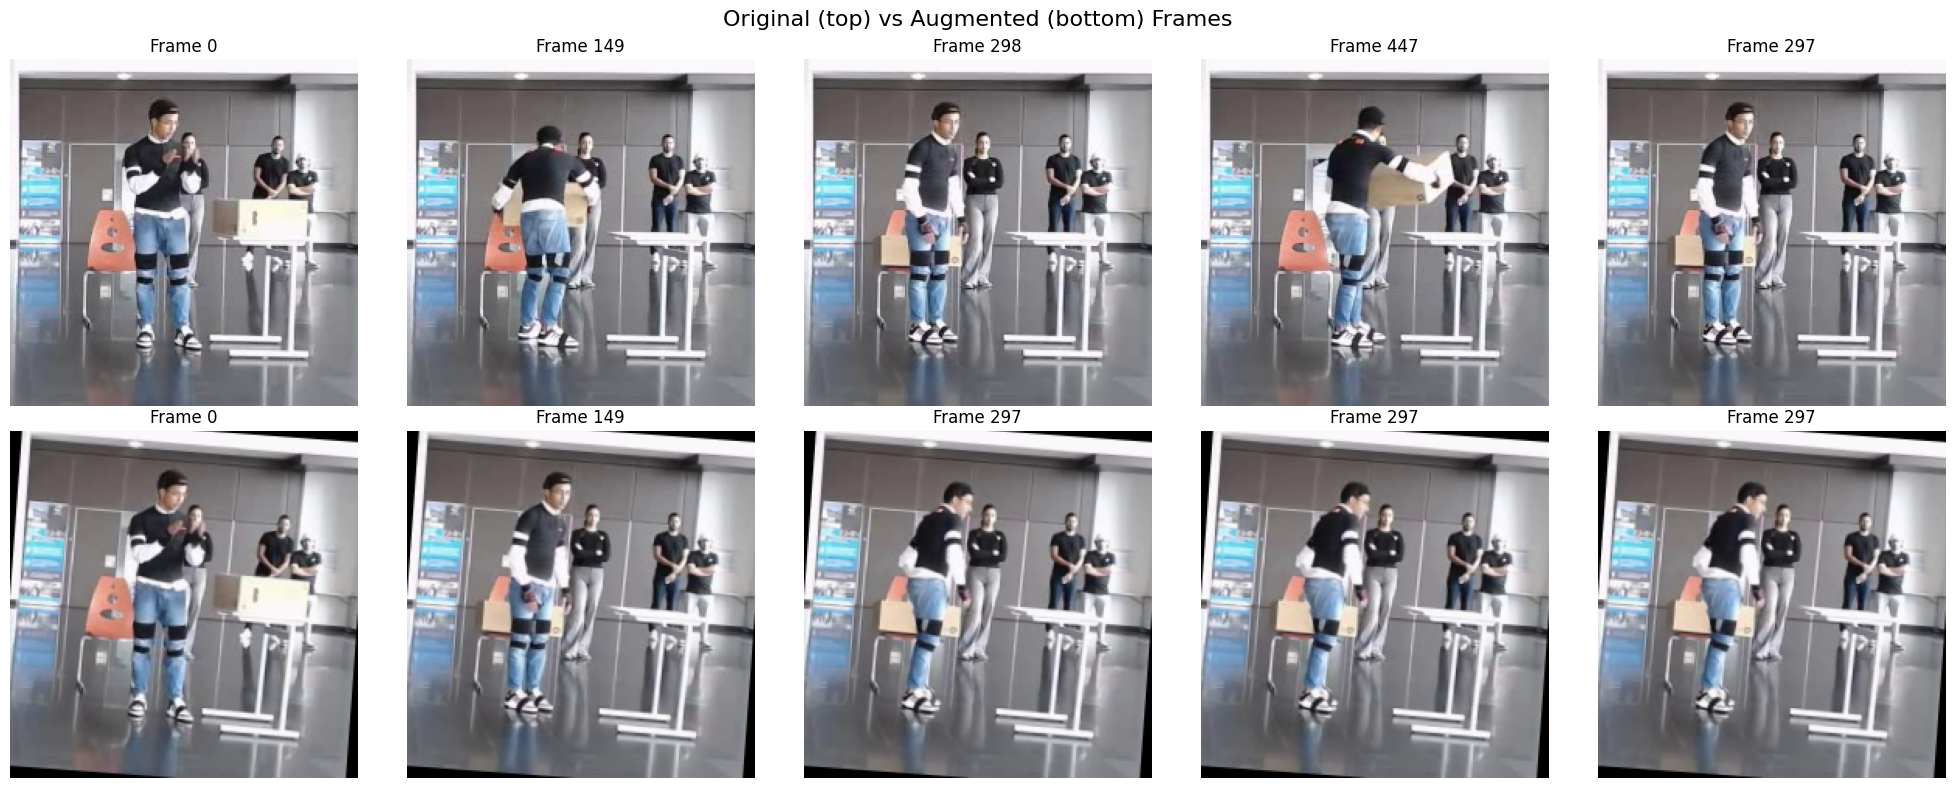

In [40]:
# Visualize comparison: Original vs Augmented frames
# Select a few frames to compare
sample_indices = [0, len(original_frames)//4, len(original_frames)//2, 3*len(original_frames)//4, min(len(original_frames)-1, len(augmented_frames)-1)]

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Original (top) vs Augmented (bottom) Frames', fontsize=16)

for i, idx in enumerate(sample_indices):
    # Original frame
    axes[0, i].imshow(original_frames[idx])
    axes[0, i].set_title(f'Frame {idx}')
    axes[0, i].axis('off')
    
    # Augmented frame
    aug_idx = min(idx, len(augmented_frames)-1)
    axes[1, i].imshow(augmented_frames[aug_idx])
    axes[1, i].set_title(f'Frame {aug_idx}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [41]:
# Save the augmented video for playback
output_path = r"c:\\Users\\DHIA\\Desktop\\VLoad\\test_augmented_output.mp4"
save_video(augmented_frames, output_path, fps=30)
print(f"Augmented video saved to: {output_path}")

Augmented video saved to: c:\\Users\\DHIA\\Desktop\\VLoad\\test_augmented_output.mp4


In [44]:
# Apply augmentation to ALL videos in Augmented_Dataset
import glob
from tqdm import tqdm

# Base path
base_path = r"c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset"

# Find all mp4 files (excluding already augmented ones with _aug2)
all_videos = []
for weight_class in ['empty', 'heavy', 'light']:
    for ope in [f'ope{i}' for i in range(1, 9)]:
        for action in ['carry', 'walk']:
            folder_path = os.path.join(base_path, weight_class, ope, action)
            if os.path.exists(folder_path):
                videos = glob.glob(os.path.join(folder_path, "*.mp4"))
                # Filter out videos that already end with _aug2.mp4
                videos = [v for v in videos if not v.endswith('_aug2.mp4')]
                all_videos.extend(videos)

print(f"Found {len(all_videos)} videos to augment")
print(f"Sample paths:")
for v in all_videos[:12]:
    print(f"  - {v}")

Found 576 videos to augment
Sample paths:
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle1_part1.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle1_part1_hflip.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle1_part2.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle1_part2_hflip.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle2_part1.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle2_part1_hflip.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle2_part2.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle2_part2_hflip.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle3_part1.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle3_part1_hflip.mp4
  - c:\Users\DHIA\Desktop\VLoad\Augmented_Dataset\empty\ope1\carry\angle3_part2.mp4
  - 

In [45]:
# Process all videos with augmentation
successful = 0
failed = 0
failed_videos = []

for video_path in tqdm(all_videos, desc="Augmenting videos"):
    try:
        # Load video frames
        frames = load_video_frames(video_path)
        
        if len(frames) == 0:
            print(f"Warning: No frames in {video_path}")
            failed += 1
            failed_videos.append(video_path)
            continue
        
        # Apply augmentation
        augmented = seq(frames)
        
        # Create output path: replace .mp4 with _aug2.mp4
        output_path = video_path.replace('.mp4', '_aug2.mp4')
        
        # Save augmented video
        save_video(augmented, output_path, fps=30)
        successful += 1
        
    except Exception as e:
        print(f"Error processing {video_path}: {e}")
        failed += 1
        failed_videos.append(video_path)

print(f"\n{'='*50}")
print(f"Augmentation complete!")
print(f"Successful: {successful}")
print(f"Failed: {failed}")
if failed_videos:
    print(f"Failed videos: {failed_videos}")

Augmenting videos: 100%|██████████| 576/576 [44:08<00:00,  4.60s/it]


Augmentation complete!
Successful: 576
Failed: 0
